In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import math
from scipy import stats
import geopandas as gpd
%matplotlib inline
from sklearn import preprocessing

In [2]:
Model_I = pd.read_csv('Model I.csv')

In [3]:
Model_I.head()

,Neighborhood-index,Adults Reporting Exercise in the Past 30 Days,Adults Reporting Secondhand Smoke at Home,Adults with Asthma in the Past 12 Months,Adults with High Cholesterol,Adults without a Smoke-Free Home Policy,Air Toxics Concentrations- Average Benzene Concentrations,Air Toxics Concentrations- Average Formaldehyde Concentrations,Asthma Hospitalizations (Adults),Asthma Hospitalizations (Children 0 to 4 Yrs Old),...,Cigarette Smoking among Adults,Fine Particulate Matter (PM2.5),Neighborhood Race/Ethnicity - Non Hispanic Black,Neighborhood Race/Ethnicity - Non Hispanic White,Nitric Oxide (NO),Nitrogen Dioxide (NO2),Overweight or Obese Adults,predicted annual average fine particulate matter <2.5 microns,Walkability Index (Infrastructure),Chronic Obstructive Pulmonary Disease Hospitalization
0,Bayside - Little Neck,75.333333,2.350,2.616667,30.6875,24.52,1.2,1.9,21.855556,25.866667,...,12.166667,9.109333,1,2,20.868667,18.537333,48.116667,9.147342,-2.12,44.883333
1,Bedford Stuyvesant - Crown Heights,74.933333,9.100,5.450000,26.1375,29.16,1.3,2.0,395.105556,224.033333,...,18.266667,9.778000,3,1,22.672000,24.560667,63.483333,9.722558,1.64,180.250000
2,Bensonhurst - Bay Ridge,71.883333,4.850,1.050000,34.8375,29.16,1.6,2.0,58.927778,17.591667,...,18.216667,9.210667,1,3,18.699333,20.423333,52.400000,9.208983,0.24,119.088889
3,Borough Park,70.233333,3.775,2.866667,33.8250,26.24,1.5,2.0,103.816667,31.433333,...,15.483333,9.457333,1,3,20.108667,22.531333,55.083333,9.560240,0.17,131.144444
4,Canarsie - Flatlands,75.216667,4.225,3.166667,28.5125,20.38,1.1,1.8,126.544444,87.758333,...,12.850000,9.118000,3,2,18.268000,17.801333,65.016667,8.751160,-0.99,100.688889


In [4]:
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
hc = HillClimbSearch(Model_I, scoring_method=BicScore(Model_I))
best_model = hc.estimate()
print(best_model.edges())

[('Neighborhood Race/Ethnicity - Non Hispanic White', 'Neighborhood Race/Ethnicity - Non Hispanic Black')]


In [5]:
len(Model_I.columns)

23

In [6]:
# X is Model_I w/o Neighborhood name
X = Model_I.iloc[:,1:23]

## Gaussian Mixture Clustering

In [7]:
from sklearn.mixture import GaussianMixture
GM=GaussianMixture(n_components=3,random_state=999)
GM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=999, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

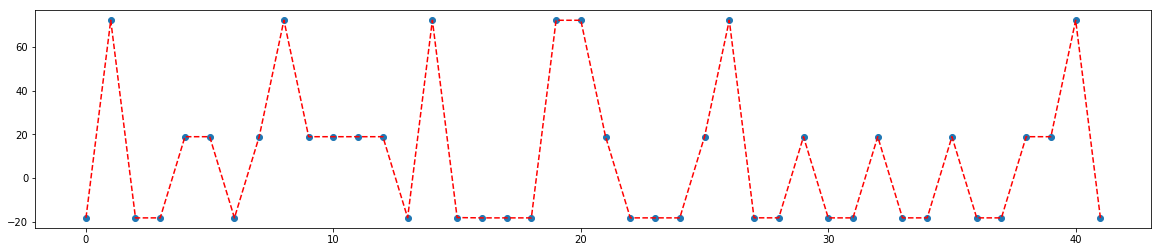

In [8]:
# score_samples function gives the log of the probability density of each data record given its cluster.
# Note that probability densities can exceed 1 (unlike probabilities of discrete data).
import matplotlib.pylab as plt
plt.figure(figsize=(20,4))
plt.scatter(range(len(X)),GM.score_samples(X)) #gives each data record's log-likelihood. allows for direct anamoly detection
plt.plot(GM.score_samples(X),"r--")
plt.show()

In [9]:
# 5 most anomalous data points by log-likelihood (i.e. log probability density)
pd.DataFrame(GM.score_samples(X)).sort_values(0)[:5]

,0
22,-18.164080
16,-18.163984
2,-18.163572
6,-18.162532
24,-18.161988


In [10]:
Model_I.iloc[[22,16, 2, 6, 24],:]

#Model_I[6]

,Neighborhood-index,Adults Reporting Exercise in the Past 30 Days,Adults Reporting Secondhand Smoke at Home,Adults with Asthma in the Past 12 Months,Adults with High Cholesterol,Adults without a Smoke-Free Home Policy,Air Toxics Concentrations- Average Benzene Concentrations,Air Toxics Concentrations- Average Formaldehyde Concentrations,Asthma Hospitalizations (Adults),Asthma Hospitalizations (Children 0 to 4 Yrs Old),...,Cigarette Smoking among Adults,Fine Particulate Matter (PM2.5),Neighborhood Race/Ethnicity - Non Hispanic Black,Neighborhood Race/Ethnicity - Non Hispanic White,Nitric Oxide (NO),Nitrogen Dioxide (NO2),Overweight or Obese Adults,predicted annual average fine particulate matter <2.5 microns,Walkability Index (Infrastructure),Chronic Obstructive Pulmonary Disease Hospitalization
22,Kingsbridge - Riverdale,75.000000,2.850,3.991667,35.1625,22.38,1.6,2.2,82.344444,47.750000,...,11.466667,10.094000,2,2,20.610000,20.604000,55.800000,10.088418,-2.42,64.611111
16,Gramercy Park - Murray Hill,87.400000,1.625,2.575000,30.1000,22.90,2.8,2.8,35.016667,22.725000,...,13.316667,13.893333,1,3,47.506667,38.820000,41.150000,14.181719,6.08,47.472222
2,Bensonhurst - Bay Ridge,71.883333,4.850,1.050000,34.8375,29.16,1.6,2.0,58.927778,17.591667,...,18.216667,9.210667,1,3,18.699333,20.423333,52.400000,9.208983,0.24,119.088889
6,Chelsea - Clinton,86.616667,4.300,3.191667,27.5875,27.06,3.1,2.9,65.133333,24.800000,...,14.500000,13.165333,1,3,42.667333,36.168667,37.400000,13.957962,7.09,63.722222
24,Lower Manhattan,82.250000,4.750,4.033333,23.2625,31.62,2.1,2.3,19.366667,16.308333,...,16.066667,11.956000,1,3,32.994667,32.971333,42.833333,11.198379,8.42,21.122222


In [16]:
Model_I.columns

Index([u'Neighborhood-index', u'Adults Reporting Exercise in the Past 30 Days',
       u'Adults Reporting Secondhand Smoke at Home',
       u'Adults with Asthma in the Past 12 Months',
       u'Adults with High Cholesterol',
       u'Adults without a Smoke-Free Home Policy',
       u'Air Toxics Concentrations- Average Benzene Concentrations',
       u'Air Toxics Concentrations- Average Formaldehyde Concentrations',
       u'Asthma Hospitalizations (Adults)',
       u'Asthma Hospitalizations (Children 0 to 4 Yrs Old)',
       u'Asthma Hospitalizations (Children 5 to 17 Yrs Old)', u'Black Carbon',
       u'Boiler Emissions- Total PM2.5 Emissions',
       u'Cigarette Smoking among Adults', u'Fine Particulate Matter (PM2.5)',
       u'Neighborhood Race/Ethnicity - Non Hispanic Black',
       u'Neighborhood Race/Ethnicity - Non Hispanic White',
       u'Nitric Oxide (NO)', u'Nitrogen Dioxide (NO2)',
       u'Overweight or Obese Adults',
       u'predicted annual average fine particulate mat

In [17]:
Neighborhood_COPD = Model_I[['Neighborhood-index', 'Chronic Obstructive Pulmonary Disease  Hospitalization']]
Neighborhood_COPD.iloc[[22,16, 2, 6, 24],:]

,Neighborhood-index,Chronic Obstructive Pulmonary Disease Hospitalization
22,Kingsbridge - Riverdale,64.611111
16,Gramercy Park - Murray Hill,47.472222
2,Bensonhurst - Bay Ridge,119.088889
6,Chelsea - Clinton,63.722222
24,Lower Manhattan,21.122222


## K-means Model I

In [18]:
# make each column have mean = 0 and std dev = 1
# Normalizing data through pre-processing package
# X_scaled is a df that's X normalized with the package

X_scaled = preprocessing.scale(X)

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [29]:
from sklearn.cluster import KMeans
KM_scaled=KMeans(n_clusters=2,random_state=999)
scor_scaled=KM_scaled.fit_predict(X_scaled)

# distance to each cluster center
res_scaled=pd.DataFrame(KM_scaled.transform(X_scaled))
res_scaled.head()


res_scaled=pd.concat((res_scaled,pd.DataFrame(KM_scaled.fit_predict(X_scaled))),axis=1)
res_scaled.columns=list(range(2))+["cluster"]
res_scaled.loc[:,"score"]=res_scaled.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res_scaled.sort_values("score",ascending=False)[:5]



x_scaled = res_scaled.loc[:,"score"]
df_Nscaled = Model_I
df_Nscaled = df_Nscaled.reset_index()
df_Nscaled['K-means'] = x_scaled
df_Kscaled = df_Nscaled[['Neighborhood-index','Chronic Obstructive Pulmonary Disease  Hospitalization', 'K-means']]
df_Kscaled.nlargest(5, 'K-means')

,Neighborhood-index,Chronic Obstructive Pulmonary Disease Hospitalization,K-means
19,High Bridge - Morrisania,183.555556,5.444397
8,Crotona -Tremont,139.905556,5.290199
31,Southeast Queens,82.333333,4.831163
29,Rockaways,173.461111,4.745670
1,Bedford Stuyvesant - Crown Heights,180.250000,4.737643


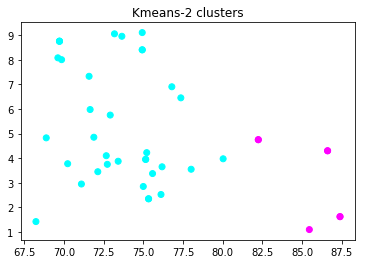

In [21]:
x_scaled_first2cols = Model_I.iloc[:,1:3]
x_scaled_first2cols['cluster'] = (res_scaled.loc[:,"cluster"])
#plt.subplot(1,2,2)
plt.scatter(x_scaled_first2cols.iloc[:,0], x_scaled_first2cols.iloc[:,1], c=x_scaled_first2cols['cluster'], cmap=plt.cm.cool)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.xticks(())
#plt.yticks(())
plt.title("Kmeans-{} clusters".format(2))
plt.show()

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km_scaled = KMeans(n_clusters=n_clusters, random_state=999)
    cluster_labels = km_scaled.fit_predict(x_scaled_first2cols.iloc[:,0:2])
    #report average Silhouette score
    silhouette_avg = silhouette_score(x_scaled_first2cols.iloc[:,0:2], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.605914840861
For n_clusters =3, the average silhouette_score is :0.420314259801
For n_clusters =4, the average silhouette_score is :0.46630861084


## K-Means Model I
Normalized with mean/std/sigma

In [13]:
# # normalization (from ADS regularization notebook)
# # learn standardization parameters from training set

#Here, we are normalizing through taking means/stds/sigma

mu = X.mean()
# #mu_y = y_train.mean()
sigma = X.std()
# #sigma_y = y_train.std()
# # apply standardization to training and testing set
X=(X-mu)/sigma
# # X_test = (X_test - mu)/sigma
# # y_train=(y_train-mu_y)/sigma_y
# # y_test = (y_test - mu_y)/sigma_y

In [14]:
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=2,random_state=999)
scor=KM.fit_predict(X)

# distance to each cluster center
res=pd.DataFrame(KM.transform(X))
res.head()

,0,1
0,4.013207,7.685680
1,4.680903,9.725099
2,3.895550,7.909072
3,3.004421,7.537363
4,2.862092,8.842292


In [15]:
res=pd.concat((res,pd.DataFrame(KM.fit_predict(X))),axis=1)
res.columns=list(range(2))+["cluster"]
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

# find data records farthest from cluster centers
res.sort_values("score",ascending=False)[:5]

,0,1,cluster,score
19,5.379192,9.404216,0,5.379192
8,5.226841,9.257443,0,5.226841
31,4.773303,9.792839,0,4.773303
29,4.688833,11.100753,0,4.688833
1,4.680903,9.725099,0,4.680903


In [16]:
x = res.loc[:,"score"]
df_N = Model_I
df_N = df_N.reset_index()
df_N['K-means'] = x
df_K = df_N[['Neighborhood-index','K-means']]
df_K.nlargest(5, 'K-means')

,Neighborhood-index,K-means
19,High Bridge - Morrisania,5.379192
8,Crotona -Tremont,5.226841
31,Southeast Queens,4.773303
29,Rockaways,4.688833
1,Bedford Stuyvesant - Crown Heights,4.680903


In [17]:
# create a df that's just the first 2 numeric cols of Model_I
# to be able to plot the cluster labels
x_first2cols = Model_I.iloc[:,1:3]

In [18]:
# add the cluster label to the df
x_first2cols['cluster'] = (res.loc[:,"cluster"])

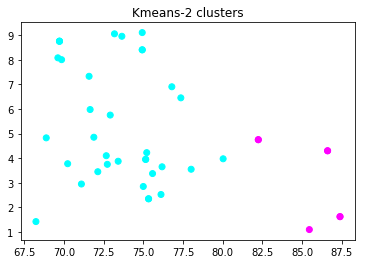

In [19]:
#plt.subplot(1,2,2)
plt.scatter(x_first2cols.iloc[:,0], x_first2cols.iloc[:,1], c=x_first2cols['cluster'], cmap=plt.cm.cool)
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.xticks(())
#plt.yticks(())
plt.title("Kmeans-{} clusters".format(2))
plt.show()

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=999)
    cluster_labels = km.fit_predict(x_first2cols.iloc[:,0:2])
    #report average Silhouette score
    silhouette_avg = silhouette_score(x_first2cols.iloc[:,0:2], cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.605914840861
For n_clusters =3, the average silhouette_score is :0.420314259801
For n_clusters =4, the average silhouette_score is :0.46630861084


### Isolation Forest Modeling

In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
clf = IsolationForest(max_samples=50, random_state=123)
clf.fit_predict(X)
IsoForest = (clf.score_samples(X))

C:\Users\aniha\Anaconda3\envs\TwentySevenVersion\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [28]:
#Iso_score = GM.score_samples(Data_Numeric.iloc[:,1:32])
df_I = Model_I
df_I = df_I.reset_index()
df_I['IsoFoScore'] = IsoForest
df_I = df_I[['Neighborhood-index','IsoFoScore']]
df_I.nsmallest(5, 'IsoFoScore')

,Neighborhood-index,IsoFoScore
16,Gramercy Park - Murray Hill,-0.545457
6,Chelsea - Clinton,-0.544389
18,Greenwich Village - SoHo,-0.529420
24,Lower Manhattan,-0.513293
29,Rockaways,-0.507330


## LOF Clustering

In [44]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model
clf_LOF = LocalOutlierFactor(n_neighbors=5)
y_pred = clf_LOF.fit_predict(X)
LOF = (clf_LOF.negative_outlier_factor_)

In [45]:
# fit the model
df_LOF = Model_I
df_LOF = df_LOF.reset_index()
df_LOF['LOF_Score'] = LOF
df_LOF = df_LOF[['Neighborhood-index', 'Chronic Obstructive Pulmonary Disease  Hospitalization', 'LOF_Score']]
df_LOF.nsmallest(5, 'LOF_Score')

,Neighborhood-index,Chronic Obstructive Pulmonary Disease Hospitalization,LOF_Score
7,Coney Island - Sheepshead Bay,224.666667,-1.728014
40,Williamsburg - Bushwick,119.361111,-1.229656
39,West Queens,166.255556,-1.167139
30,South Beach - Tottenville,167.988889,-1.121515
29,Rockaways,173.461111,-1.114746


In [46]:
# reshape X to be able to plot LOF graph
X_reshape = X.values.reshape(-2,2)

In [47]:
len(X_reshape)

462

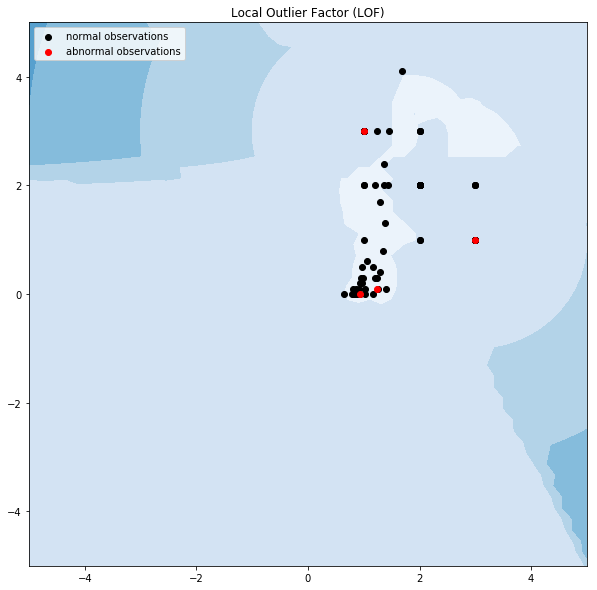

In [48]:
# fit the model
clf_LOF = LocalOutlierFactor(n_neighbors=5)
y_pred = clf_LOF.fit_predict(X_reshape)
#y_pred_outliers = y_pred[200:]

# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
Z = clf_LOF._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,10))


plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X_reshape[:441, 0],X_reshape[:441, 1], c='black')
b = plt.scatter(X_reshape[441:, 0], X_reshape[441:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()

## DBSCAN -- COPD NOT Included

In [29]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.cluster as cluster
import time
from sklearn import cluster, datasets

In [30]:
def visuDB(data,eps,min_samples):
    db = DBSCAN(eps, min_samples).fit(data)
    plt.figure(figsize=(6,6))
    plt.scatter(X_reshape[:,0],X_reshape[:,1],c=db.labels_,s=10)
    print "Proportion of unclustered points=",(1*(db.labels_ < 0)).mean()
    plt.show()

Proportion of unclustered points= 0.049783549783549784


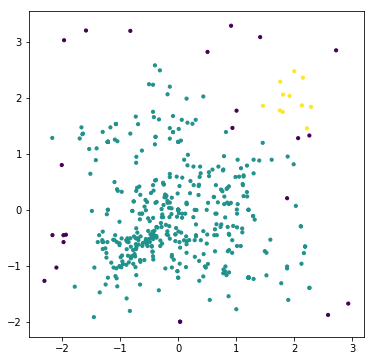

In [31]:
visuDB(X_reshape,0.5,7)

In [32]:
# your code here

total_num_samples = len(X_reshape[:,0])
max_eps = max(np.max(X_reshape[:,0])-np.min(X_reshape[:,0]),np.max(X_reshape[:,1])-np.min(X_reshape[:,1]))

for eps in np.logspace(np.log10(max_eps)-3,np.log10(max_eps),10):
    for min_samples in np.linspace(40,800,40,endpoint=True):
        db = DBSCAN(eps, min_samples).fit(X_reshape)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):
            dbb=db
            plt.figure(figsize=(8,8))
            print "eps =", eps, ", min_samples =", min_samples, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])
            
            # evaluation
            num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
            print "precision=",1.0*num_correct_clustered/num_clustered,"recall=",1.0*num_correct_clustered/100.0
            
            plt.scatter(X_reshape[:,0],X_reshape[:,1],c=db.labels_,s=10,cmap=plt.cm.cool)
            plt.show()